In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/content/AirQualityUCI.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/content/AirQualityUCI.csv')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10.00.00,3.1,1314,-200.0,13.5,1101,472,539,190,1374,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11.00.00,2.4,1163,-200.0,11.4,1027,353,604,179,1264,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12.00.00,2.4,1142,-200.0,12.4,1063,293,603,175,1241,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13.00.00,2.1,1003,-200.0,9.5,961,235,702,156,1041,770.0,28.3,13.5,0.5139


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
h = df['Time'].tolist()
l=[]
for i in range(len(h)):
    l.append(h[i].split(".")[0])
df['hour']=l
    

In [6]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,year,month,day
0,2004-10-03,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578,18,2004,10,3
1,2004-10-03,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255,19,2004,10,3
2,2004-10-03,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502,20,2004,10,3
3,2004-10-03,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867,21,2004,10,3
4,2004-10-03,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888,22,2004,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314,-200.0,13.5,1101,472,539,190,1374,1729.0,21.9,29.3,0.7568,10,2005,4,4
9353,2005-04-04,11.00.00,2.4,1163,-200.0,11.4,1027,353,604,179,1264,1269.0,24.3,23.7,0.7119,11,2005,4,4
9354,2005-04-04,12.00.00,2.4,1142,-200.0,12.4,1063,293,603,175,1241,1092.0,26.9,18.3,0.6406,12,2005,4,4
9355,2005-04-04,13.00.00,2.1,1003,-200.0,9.5,961,235,702,156,1041,770.0,28.3,13.5,0.5139,13,2005,4,4


In [7]:
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)

In [8]:
df = df.fillna(df.mean())


In [9]:
X = df.drop('CO(GT)', axis=1).head(9356)
X_test = df.drop('CO(GT)', axis=1).tail(1)

y = df['CO(GT)'].values[:-1]

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [11]:
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.498737082408125


In [13]:
print('intercept:', model.intercept_)


intercept: 23739.59885082742


In [14]:
print('slope:', model.coef_)


slope: [ 1.18046344e-02  4.66161419e-02  5.29014390e-01 -3.58116073e-02
  2.98046511e-02 -2.14972342e-03  4.03374429e-01 -1.62765920e-02
 -1.77671129e-02  4.46522936e-01  2.05434925e-01 -9.05182637e-01
 -4.36693044e-01 -1.18438848e+01 -1.52133814e-02 -6.36114488e-01]


In [15]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[12.3578626]


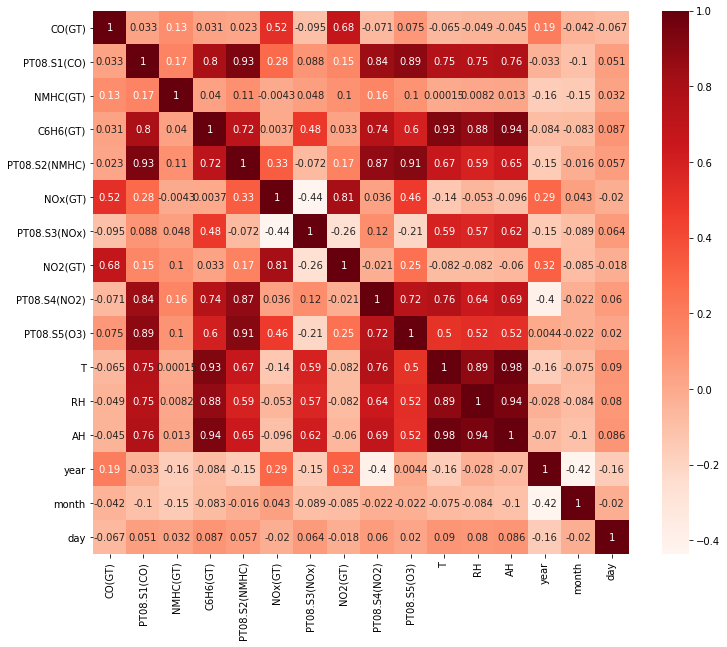

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()